In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
train_df = pd.read_csv(os.path.join("../input",'train.csv'), dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

In [3]:
train_df.shape

(629145480, 2)

# Training set 

In [35]:
part_data = train_df.iloc[:int(629145480/10)]
def plot_signal_and_time(data_set,title="signal"):
    fig,ax1 = plt.subplots(figsize=(14,8))
    ax1.set_ylabel('acoustic_signal', color="blue")
    ax1.plot(data_set["acoustic_data"])
    
    ax2 = ax1.twinx()
    ttf_color = "red"
    ax2.set_ylabel('time_to_failure', color=ttf_color)
    ax2.plot(data_set["time_to_failure"],color=ttf_color)
    ax2.tick_params(axis='y', labelcolor=ttf_color)
    plt.title(title)
# plot_signal_and_time(part_data)

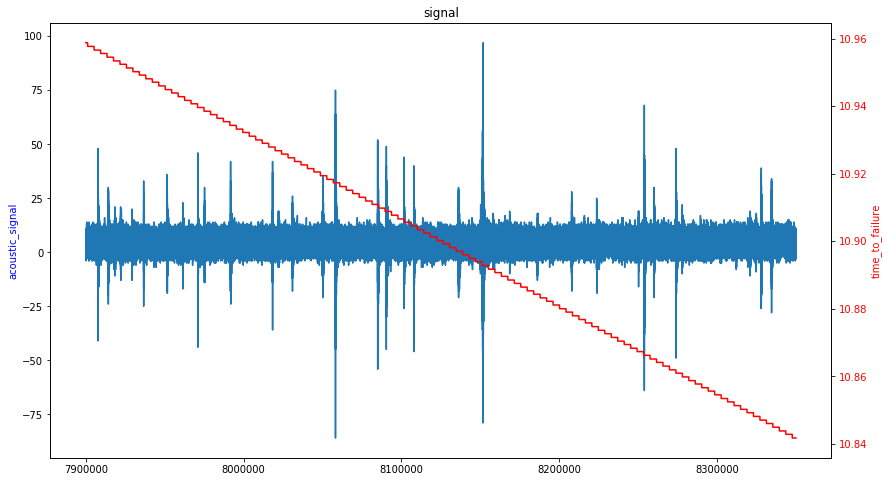

In [5]:
segment_after = train_df.iloc[int(7.9e6):int(8.35e6)]
plot_signal_and_time(segment_after)

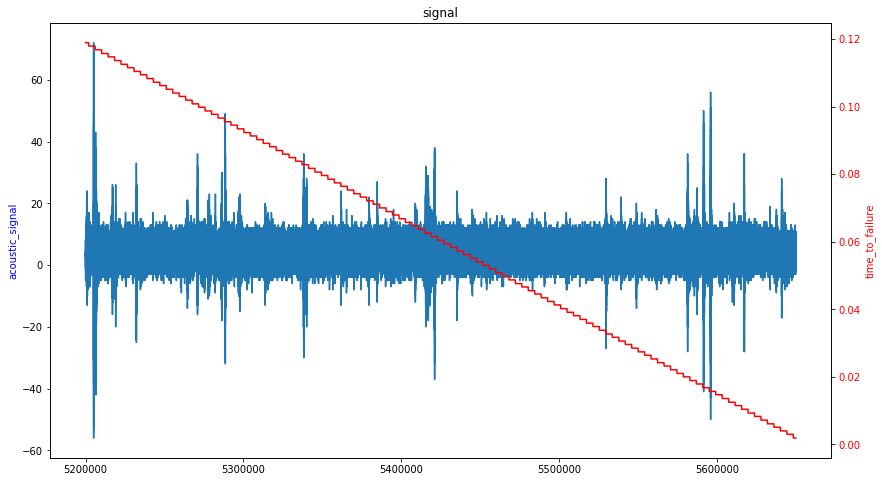

In [6]:
segment = train_df.iloc[int(5.2e6):int(5.65e6)]
plot_signal_and_time(segment)

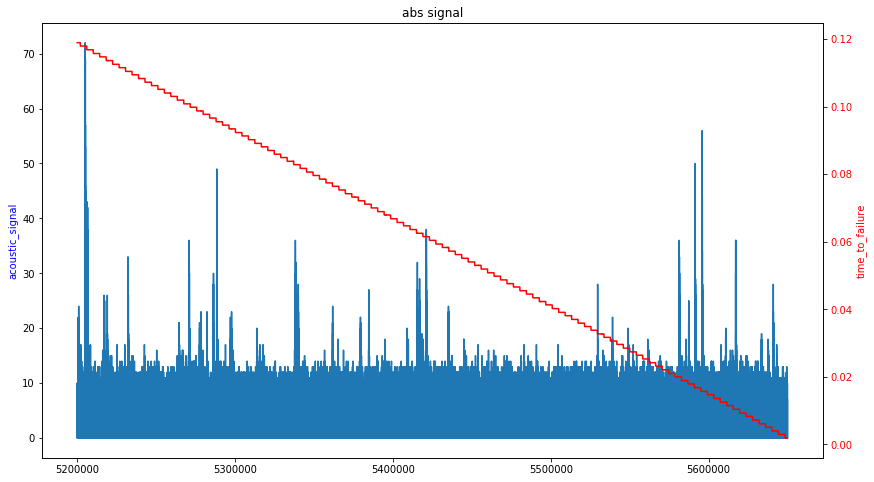

In [52]:
abs_segment = pd.DataFrame()

abs_segment["acoustic_data"] = segment["acoustic_data"].abs()
abs_segment["time_to_failure"] = segment["time_to_failure"]
plot_signal_and_time(abs_segment,"abs signal")

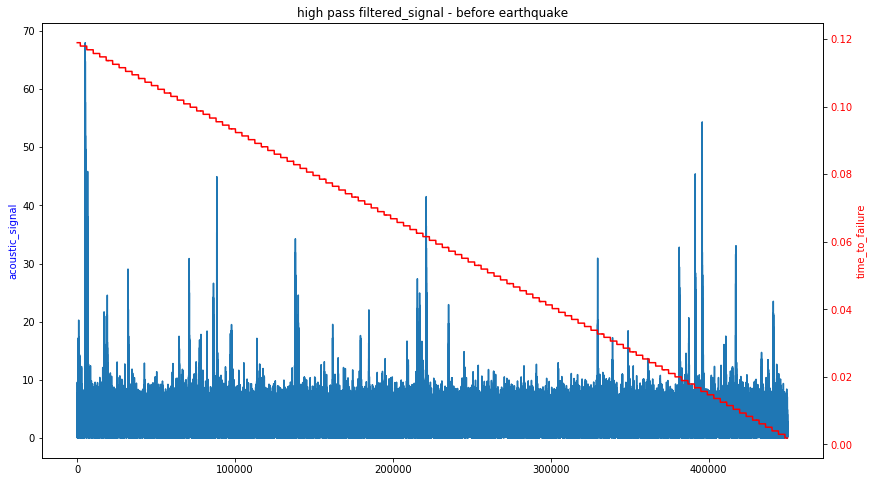

In [47]:
from scipy import signal
sample_rate = 4e6
frequency = 1e3
nyquist = 0.5 * sample_rate
normalized = frequency / nyquist

sos = signal.butter(10, normalized, 'highpass',output='sos')
filtered_segment = pd.DataFrame()
filtered_segment["acoustic_data"] = signal.sosfilt(sos,segment["acoustic_data"])
filtered_segment["time_to_failure"] = segment.reset_index()["time_to_failure"]
plot_signal_and_time(filtered_segment,"high pass filtered_signal - before earthquake")


183

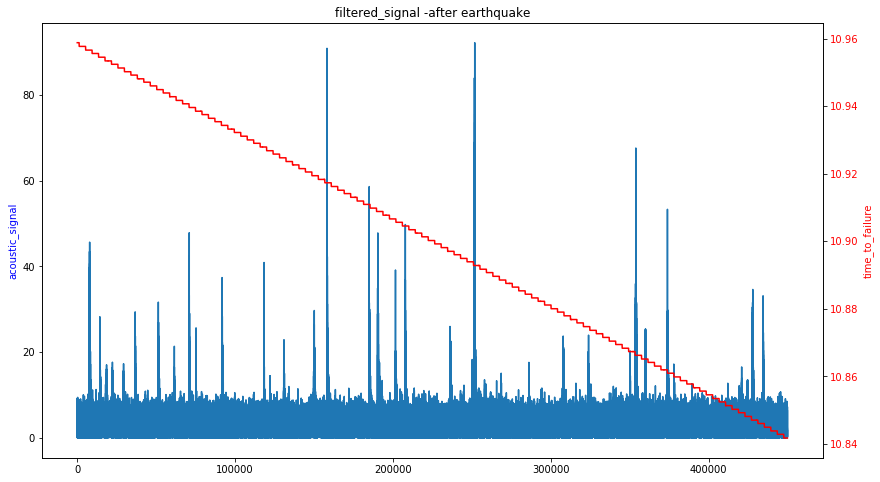

In [49]:
from scipy import signal
plt.rcParams['agg.path.chunksize'] = 20000
sos = signal.butter(10, normalized, btype='highpass',output='sos')
filtered_segment = pd.DataFrame()
filtered_segment["acoustic_data"] = np.abs(signal.sosfilt(sos,segment_after["acoustic_data"]))
filtered_segment["time_to_failure"] = segment_after.reset_index()["time_to_failure"]

plot_signal_and_time(filtered_segment,"filtered_signal -after earthquake")


segment_after["acoustic_data"].ptp()

In [ ]:
from scipy.fftpack import fft
ax,fig = plt.subplots(figsize=(14,6))
fft_signal = fft(segment["acoustic_data"])

plt.plot(np.abs(fft_signal))

In [ ]:
tenth_data = train_df.iloc[:int(629145480/10)]
tenth_data["acoustic_data"].plot.hist(bins=15)

10.974211755093195

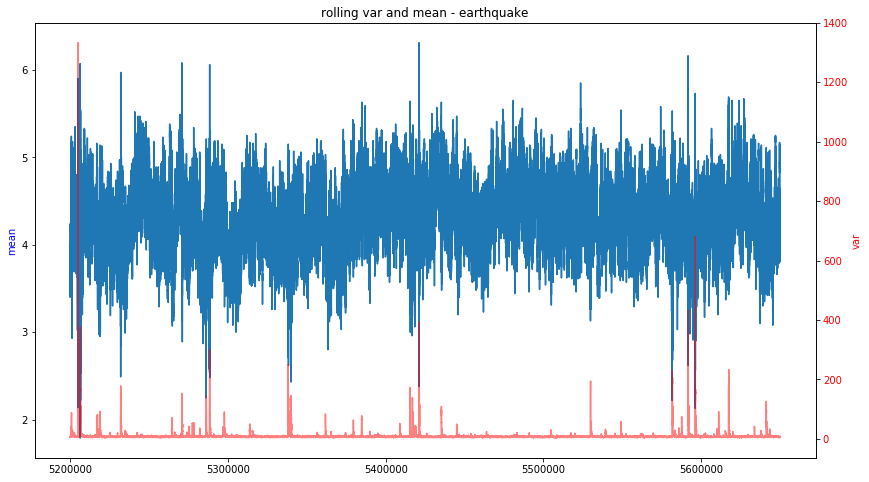

In [21]:
rolling = pd.DataFrame()
rolling["mean"] = segment["acoustic_data"].rolling(100).mean().dropna()
rolling["var"] = segment["acoustic_data"].rolling(100).var().dropna()

fig,ax1 = plt.subplots(figsize=(14,8))
ax1.set_ylabel('mean', color="blue")
ax1.plot(rolling["mean"])

ax2 = ax1.twinx()
ttf_color = "red"
ax2.set_ylabel('var', color=ttf_color)
ax2.plot(rolling["var"],color=ttf_color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=ttf_color)
plt.title("rolling var and mean - earthquake")

rolling["var"].mean()
# from scipy import fft
# freq_mean = fft(rolling["mean"])
# freq_mean.mean()

12.838404665412817

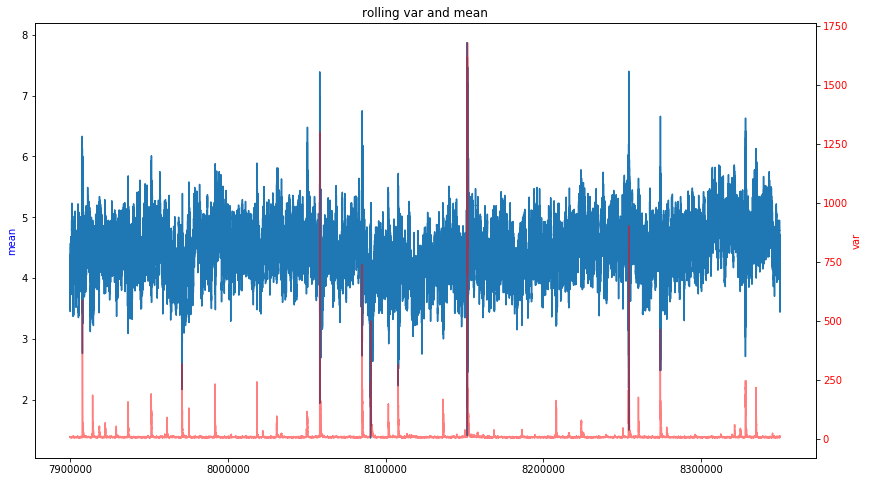

In [22]:
rolling = pd.DataFrame()
rolling["mean"] = segment_after["acoustic_data"].rolling(100).mean().dropna()
rolling["var"] = segment_after["acoustic_data"].rolling(100).var().dropna()

fig,ax1 = plt.subplots(figsize=(14,8))
ax1.set_ylabel('mean', color="blue")
ax1.plot(rolling["mean"])

ax2 = ax1.twinx()
ttf_color = "red"
ax2.set_ylabel('var', color=ttf_color)
ax2.plot(rolling["var"],color=ttf_color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=ttf_color)
plt.title("rolling var and mean")

rolling["var"].mean()
# from scipy import fft
# freq_mean = fft(rolling["mean"])
# np.real(freq_mean.mean())
# freq_mean.mean()

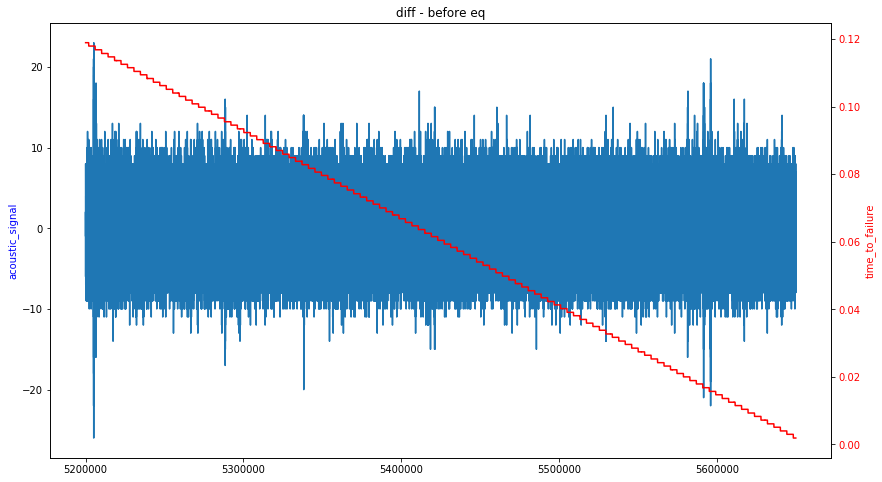

In [60]:
diff_segment = pd.DataFrame()

diff_segment["acoustic_data"] = segment["acoustic_data"].diff()
diff_segment["time_to_failure"] = segment["time_to_failure"]
plot_signal_and_time(diff_segment,"diff - before eq")

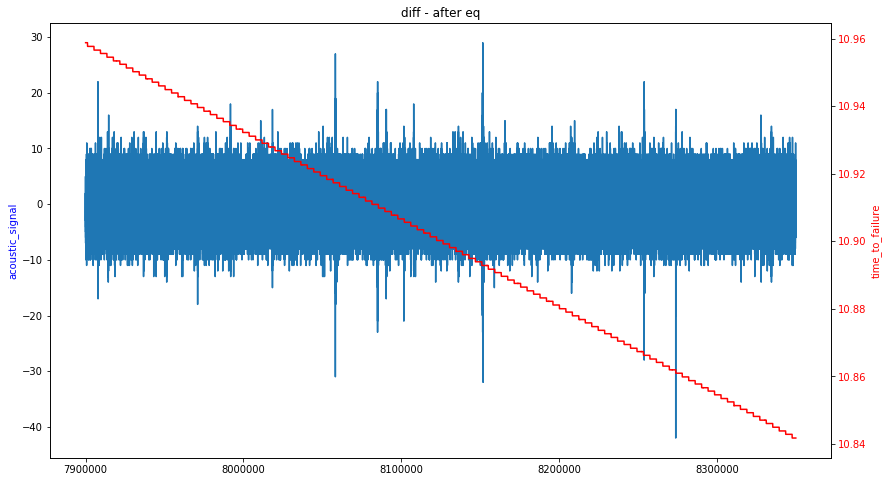

In [58]:
diff_segment_after = pd.DataFrame()

diff_segment_after["acoustic_data"] = segment_after["acoustic_data"].diff()
diff_segment_after["time_to_failure"] = segment_after["time_to_failure"]
plot_signal_and_time(diff_segment_after,"diff - after eq")

,acoustic_data,time_to_failure
count,449999.000000,450000.000000
mean,-0.000013,10.900084
std,3.150589,0.033747
min,-42.000000,10.841698
25%,-2.000000,10.870399
50%,0.000000,10.900197
75%,2.000000,10.928999
max,29.000000,10.958797


,acoustic_data,time_to_failure
count,449999.000000,450000.000000
mean,0.000011,0.060449
std,3.119729,0.033747
min,-26.000000,0.001898
25%,-2.000000,0.031696
50%,0.000000,0.060398
75%,2.000000,0.090195
max,23.000000,0.118898
